In [38]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [39]:
overall = {}

for folder in os.listdir("best_hard/5/0/"):
    overall[folder] = []
    for filename in os.listdir("best_hard/5/0/"+folder):
        try:
            if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                continue
            with open("best_hard/5/0/"+folder+"/"+filename, 'r') as f:
                dic = json.load(f)
            overall[folder].append(dic['mean separation after push'] - dic['mean separation before push'])
        except:
            continue

In [40]:
optimal = {}
for filename in os.listdir("best_hard/5/0/distribution_stable"):
    try:
        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
            continue
        with open("best_hard/5/0/distribution_stable/"+filename, 'r') as f:
            dic = json.load(f)
        key = filename.split("_")[0]
        if not key in optimal.keys():
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    except:
        continue
optimal_final = [optimal[key][0] for key in optimal.keys()]
overall["optimal"] = optimal_final

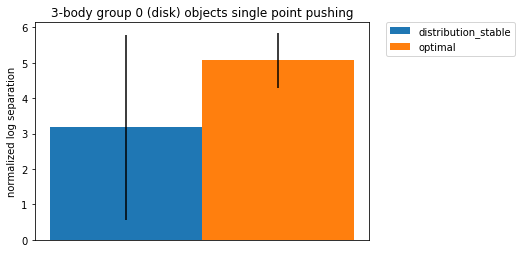

In [41]:
policy_lst = list(overall.keys())

graph_info = {}

for p in policy_lst:
    if p != "distribution":
        graph_info[p] = [[np.mean(overall[p])], \
                          [2*np.std(overall[p])], \
                          [2*np.std(overall[p])]]

width = 0.1
fig, ax = plt.subplots()
i = 0

for p in policy_lst:
    rects = ax.bar(width*i, graph_info[p][0], width, yerr=[graph_info[p][1], graph_info[p][2]], label=p)
    i+=1


ax.set_ylabel('normalized log separation')
ax.set_xticks([1])
ax.set_xticklabels(("3-body disk objects"))
ax.set_title('3-body group 0 (disk) objects single point pushing')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [57]:
proposed8 = [0.012832106003770605, 0.01649818298756145, 0.013503771013347432, 0.01337390101980418, 0.012252119020558894, 0.015178727015154436, 0.010775161994388327, 0.011897663003765047, 0.011556726007256657, 0.012238012976013124, 0.009958561975508928, 0.010255245986627415, 0.010063980997074395, 0.01044939097482711, 0.010408363974420354, 0.01002556798630394, 0.009724768984597176, 0.009717570006614551, 0.009446431999094784, 0.009705420001409948]

proposed6 = [0.011929884989513084, 0.014178954996168613, 0.01164558800519444, 0.011564179003471509, 0.014406369009520859, 0.01232852999237366, 0.009938192990375683, 0.010477614006958902, 0.01128953299485147, 0.01072992300032638, 0.009084617020562291, 0.00960659800330177, 0.009549595008138567, 0.009917828981997445, 0.012038854009006172, 0.008750150998821482, 0.008574331004638225, 0.00875708000967279, 0.008508852974046022, 0.008893594989785925]

proposed0 = [0.008161802019458264, 0.009653736022301018, 0.008316353982081637, 0.008270355989225209, 0.007902111974544823, 0.008601089008152485, 0.007939144998090342, 0.008331618999363855, 0.008149498025886714, 0.00831371097592637, 0.007763269008137286, 0.008450885012280196, 0.008255677006673068, 0.007969822006998584, 0.01217129098949954, 0.00810520799132064, 0.008293471997603774, 0.008092842996120453, 0.007891551009379327, 0.008101506013190374]

boundaryShear = [0.015152918000239879, 0.016146031994139776, 0.014725677989190444, 0.014073456986807287, 0.013521977991331369, 0.013128755002981052, 0.012157294986536726, 0.013711241976125166, 0.013723996002227068, 0.014378599997144192, 0.011387670005206019, 0.012076553015504032, 0.011443969997344539, 0.011638591007795185, 0.011458977009169757, 0.010161963989958167, 0.010416300006909296, 0.01021832402329892, 0.010132569004781544, 0.010241579991998151]

bruteForce = [16.518688519019634, 19.8578667799884, 16.681083030009177, 15.911008949013194, 14.272303144010948, 14.26824874401791, 15.255927741993219, 15.76755796399084, 16.700531223992584, 17.535902597010136, 17.032339392986614, 19.9383103059954, 16.2354087390122, 16.596027760009747, 16.40435613199952, 14.332049802003894, 16.32417245398392, 14.63927373100887, 14.398413300979882, 14.330985656008124]

clusterDiffusion = [0.01283583597978577, 0.013997638976434246, 0.012670744996285066, 0.012181607016827911, 0.011325877014314756, 0.011563306004973128, 0.009729993005748838, 0.010946856025839224, 0.010369486000854522, 0.010939833999145776, 0.009204119996866211, 0.00969780798186548, 0.009249751979950815, 0.009449001983739436, 0.009166127973003313, 0.008544230018742383, 0.009156921005342156, 0.008654369012219831, 0.010984842985635623, 0.008804558019619435]

proposed1 = [0.015089983004145324, 0.015794284990988672, 0.013627175998408347, 0.013449521997245029, 0.013158791000023484, 0.013673420995473862, 0.012202415004139766, 0.013341957004740834, 0.013100637996103615, 0.013241059001302347, 0.011315773997921497, 0.012102972017601132, 0.0119961169839371, 0.01149080999311991, 0.011466455005574971, 0.010282496979925781, 0.010507839993806556, 0.010475713992491364, 0.010727269982453436, 0.010572580009466037]

proposed9 = [0.008198649011319503, 0.010351388016715646, 0.008384410000871867, 0.008186287013813853, 0.007817595993401483, 0.009041559998877347, 0.007832000002963468, 0.009338874981040135, 0.008740298973862082, 0.010140715021407232, 0.008118967001792043, 0.008305105002364144, 0.00840845299535431, 0.008051354001509026, 0.008099831989966333, 0.0079708420089446, 0.007883824990130961, 0.008149804983986542, 0.008659851009724662, 0.007821220002369955]

maximumClearanceRatio = [0.37578673899406567, 0.3551629209832754, 0.48235141299664974, 0.33283859500079416, 0.32620974798919633, 0.44419709700741805, 0.2713540070108138, 0.2784867300069891, 0.2899800830055028, 0.29306294600246474, 0.20635425901855342, 0.22747468401212245, 0.23962573500466533, 0.2218112729897257, 0.2119536660029553, 0.1451037139922846, 0.14589864099980332, 0.1484643320145551, 0.14819969100062735, 0.14510755700757727]

quasiRandom = [0.007682346011279151, 0.007896090013673529, 0.007518981001339853, 0.00753188002272509, 0.00860005000140518, 0.007709614001214504, 0.007668840989936143, 0.00762059900444001, 0.00769645199761726, 0.00764055599574931, 0.007556479977210984, 0.007521454012021422, 0.007777463993988931, 0.007677574991248548, 0.00786288597737439, 0.007743959024082869, 0.007883220008807257, 0.007553998002549633, 0.007506513997213915, 0.007519584003603086, 0.007827456021914259, 0.007741922017885372, 0.007797275990014896, 0.007592484005726874, 0.007680256996536627, 0.007702790026087314, 0.007750446005957201, 0.007630595006048679, 0.008653030003188178, 0.007883988000685349, 0.008015939994947985, 0.007965471013449132, 0.008153043978381902, 0.007842182996682823, 0.008635359001345932, 0.007797773025231436, 0.008006870019016787, 0.00849300398840569, 0.00817723199725151, 0.00798548900638707, 0.007974710984854028, 0.008388013986404985, 0.007916798000223935, 0.008077921986114234, 0.008190841996110976, 0.008050370990531519, 0.008112379990052432, 0.00784027497866191, 0.00780688101076521, 0.0076770860177930444, 0.00801540000247769, 0.007585015002405271, 0.008217315014917403, 0.00791229199967347, 0.008364372013602406, 0.0077427399810403585, 0.008103800006210804, 0.008118233003187925, 0.008189947984647006, 0.007905578997451812, 0.0077739820117130876, 0.007867787993745878, 0.007838370016543195, 0.008037471998250112, 0.007538507983554155, 0.0075182509899605066, 0.007757290004519746, 0.007830793008906767, 0.007669713988434523, 0.00915198598522693, 0.007880607998231426, 0.007868935994338244, 0.007867705018725246, 0.007949669990921393, 0.008047887007705867, 0.007912625995231792, 0.007811140007106587, 0.007727807998890057, 0.007807504007359967, 0.00796036998508498, 0.007509906019549817, 0.007851082016713917, 0.00756037698010914, 0.007730976998573169, 0.007994456012966111, 0.00813923598616384, 0.00790185300866142, 0.007879612006945536, 0.007860458019422367, 0.00788740799180232, 0.008027242991374806, 0.00793035898823291, 0.01003024002420716, 0.0083663190016523, 0.007795933983288705, 0.007974266016390175, 0.007633606990566477, 0.007570916000986472, 0.007658466987777501, 0.007848839974030852, 0.007767622999381274, 0.00789391397847794, 0.008417889999691397, 0.00796595000429079, 0.00888909402419813, 0.007946883997647092, 0.007809049013303593, 0.008568129007471725, 0.008680443017510697, 0.007704185991315171, 0.007932150998385623, 0.007656183006474748, 0.007683092990191653, 0.007880104996729642, 0.008005156007129699, 0.00782503600930795, 0.008022241992875934, 0.007748155010631308, 0.007825410983059555, 0.0076541409944184124, 0.007641174015589058, 0.007828597008483484, 0.007890223001595587, 0.0076728310086764395, 0.007714691018918529, 0.00769359600963071, 0.0077223340049386024, 0.007713912986218929, 0.007693035004194826, 0.007911919994512573, 0.0077986359829083085, 0.007651160005480051, 0.007858771015889943, 0.00815500397584401, 0.007924894976895303, 0.007681254995986819, 0.007629183994140476, 0.008770253014517948, 0.008746509993216023, 0.00789338699541986, 0.007665862998692319, 0.007742752990452573, 0.007691506005357951, 0.007729928998742253, 0.007918048009742051, 0.007759658008581027, 0.008557975990697742, 0.007950142986373976, 0.007789015013258904, 0.007737975014606491, 0.0077709110046271235, 0.007712029997492209, 0.007758646999718621, 0.007697982015088201, 0.008125571010168642, 0.0077679239911958575, 0.007603158999700099, 0.007542484992882237, 0.007727662014076486, 0.007502679014578462, 0.0078010619909036905, 0.007881350989919156, 0.007841201993869618, 0.007837508979719132, 0.007758032996207476, 0.007724349008640274, 0.007844572013709694, 0.007879830984165892, 0.007783451001159847, 0.007723589020315558, 0.007710086996667087, 0.00768099699052982, 0.007545399013906717, 0.007609471009345725, 0.007633903005626053, 0.0077043669880367815, 0.007809725007973611, 0.00843557299231179, 0.008539991016732529, 0.007716157007962465, 0.007735893013887107, 0.007863449020078406, 0.0076121430029161274, 0.007909467007266358, 0.00766608101548627, 0.007704628020292148, 0.0077980829810258, 0.007594244001666084, 0.007567997992737219, 0.007660104980459437, 0.007651766994968057, 0.007556019001640379, 0.007767856994178146, 0.007653729000594467, 0.00775565899675712, 0.007709620025707409, 0.00759834999917075, 0.007693038001889363, 0.007713622006122023, 0.007720240013441071, 0.007648603001143783, 0.007666618999792263, 0.007634682988282293, 0.007570882997242734, 0.007521758001530543, 0.007644380006240681, 0.007543464016634971, 0.007540901977336034, 0.007987046003108844, 0.007672626001294702, 0.007712963997619227, 0.007629647006979212, 0.007621131982887164, 0.007588248001411557, 0.0075297189760021865, 0.007636253983946517, 0.007640232011908665, 0.007660603005206212, 0.007689135003602132, 0.007494901976315305]

In [58]:
np.mean(quasiRandom) * 1000

7.849571005234877